# CSE391 
## Assignment 1
##  Due: March 7th at 3:00 pm
## Generate 5000 two-dimensional  samples from a normal distribution with  mean $x=[10,20]$ and covariance matrix 
$S=\begin{bmatrix}
    3& 4  \\
    4& 8 \\
\end{bmatrix}$

## Perform the following steps

- generate the scatter plot of these two-dimensional data
- center the data 
- generate the scatter plot of after centering the data
- compute the sample covariance matrix and compare it with the acual covariance of the distribution
- are these two covariance matrices identical? if not what is the best way to make them as close of as possible ?
- compute the eigen vectors and values of the covariance matrix using np.linalg.eig; this way you decompose the covariance martix, i.e.
$S = E DE^{-1}$ where $E$ is the eigen vector matrix and $D$ is a diagonal matrix whose elements are eigen values. If you have no knowledge of eigen vectors and values, don't worry. The main objective of the assignment is not about eigen vectors and values. We will talk about them later in the course.
- transform the data matrix by $E^T$, i.e. , $X_t = E^T X$

- generate the scatter plot of the two-dimensional data $X_t$. What change you observe in the scatter plot and what is the implication of this transformation?
- transform the data matrix $X_t$ by $D^{-0.5}$, i.e. , $X_w = D^{-0.5} X_t$
- generate the scatter plot of the two-dimensional data $X_w$ .What change you observe in the scatter plot and what is implication of this transformation?

# provide the code, explanation, and scatter plot in an ipynb file such that we can run it on Jupyter notebook. 


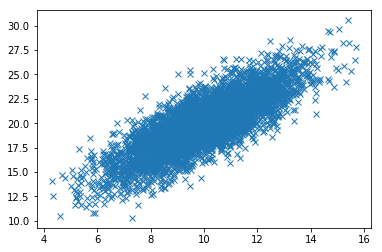

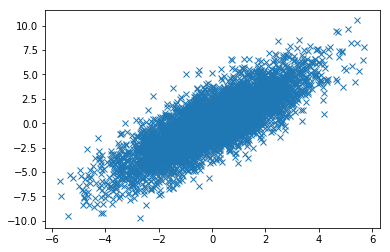

The sample covariance matrix is:
 [[ 2.94846121  3.91104047]
 [ 3.91104047  7.88840111]]
The shape of the data matrix:
 (2, 5000)
the eigen values in array form are:
 [  0.78300943  10.21699057]
E, the square matrix whose ith column is the eigen vector w_i of the covariance matrix is:
 [[-0.87464248 -0.48476853]
 [ 0.48476853 -0.87464248]]
D, the diagonal matrix whose diagonal elements are the corresponding eigen values is:
 [[  0.78300943   0.        ]
 [  0.          10.21699057]]
The covariance matrix S (=EDE^-1) is equal to:
 [[ 3.  4.]
 [ 4.  8.]]
The transformed data matrix X_t by E.T is:
 [[ 0.68638347  0.452324    0.4569031  ...,  0.89818479 -1.0758655
  -1.25590546]
 [-3.08204751  0.40781954 -1.51148524 ...,  1.01112527 -1.6756845
  -2.83040106]]
The covariance matrix of the transformed data matrix X_t by E.T is:
 [[  0.79279402  -0.02168303]
 [ -0.02168303  10.0440683 ]]


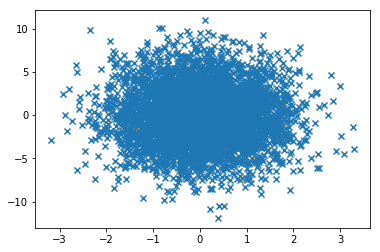

The transformed data matrix X_w by D^-0.5 is:
 [[ 0.77568129  0.51117091  0.51634576 ...,  1.01503776 -1.21583456
  -1.41929754]
 [-0.96422377  0.12758703 -0.47287071 ...,  0.31633225 -0.52424073
  -0.88549575]]
The covariance matrix of the transformed data matrix X_w by D^-0.5 is:
 [[ 1.01249612 -0.00766611]
 [-0.00766611  0.98307503]]


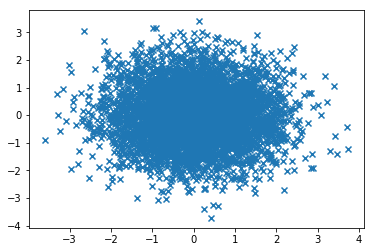

In [25]:
mean = [10, 20]
cov = [[3,4],[4,8]]

import numpy as np
import matplotlib.pyplot as plt

# 1. generate the scatter plot of these two dimensional data
x, y = np.random.multivariate_normal(mean, cov, 5000).T
# By using np.random.multivariate_normal(mean, cov, 5000), I can get 5000 random variables 
# that have 10 as a mean of x values and 20 as a mean of y values, and [[3,4],[4,8]] as a covariance matrix.
# Transposing it will give a conveniently separated x and y sets(x,y) by sequence unpacking.
plt.plot(x, y, 'x')
# Plot x vector as the value of x-axis and y vector as the value of y-axis on the scatter plot.
# Use 'x' mark for representing a node (or data).
plt.show()

# 2. center data
x = x - 10
y = y - 20
# Taking out the mean of each vector from its elements, namely x and y to center the data (to the 0).

# 3. generate the scatter plot of after centering the data
plt.plot(x, y, 'x')
plt.show()

# 4. compute the sample covariance matrix
X = np.stack((x,y), axis=0)
s_cov = np.cov(X)
print("The sample covariance matrix is:\n", s_cov)
# stack() joins a sequence of arrays along a new axis, it is used here to join x and y to a combined array.
# "axis = 0" means all cells with first dimension varying with each value of 2nd dimension and 3rd dimension and so on. 
# np.cov() estimates a covariance matrix by given data and weights (no weights have been specified here).
# X here denotes a 2-D mean-centered Data matrix that has x vector as the first dimention and y vector as the second dimention
print("The shape of the data matrix:\n", X.shape)

# 5. are these two covariance matrices identical? If not what is the best way to make them as close of as possible ?
# No, they are not identical to each other. The sample covariance matrix is slightly different than the given (original) 
# covariance matrix. The best way to make them as close as possible is to make the number of samples larger, 
# by the definition of the covariance matrix (Please See the Below Markdown).

# 6. compute the eigen vectors and values of the covariance matrix using np.linalg.eig
w, E = np.linalg.eig(cov)
D = np.diag(w)
print("the eigen values in array form are:\n", w)
print("E, the square matrix whose ith column is the eigen vector w_i of the covariance matrix is:\n", E)
print("D, the diagonal matrix whose diagonal elements are the corresponding eigen values is:\n", np.matrix(D))
print("The covariance matrix S (=EDE^-1) is equal to:\n", np.dot(np.dot(E, D), np.linalg.inv(E)))
# So here, the matrix E (the square matrix whose ith column is the eigen vector).
# np.linalg.eig() gives the eigen values and right eigen vectors of a square array.
# This returns two values, one is the eigen values, each repeated according to its multiplicity. 
# The other is the normalized (unit “length”) eigenvectors, such that the column E[:,i] is the eigen vector 
# corresponding to the eigen value w[i].
# D indicates the diagonal matrix from the decomposition of the covariance matrix, which contains the eigen values.
# np.diag() give a diagonal matrix using the vector specified in the argument. 

# 7. transform the data matrix by E.T, i.e., X_t = E.T * X
X_t = np.dot(E.T, X)
print("The transformed data matrix X_t by E.T is:\n", X_t)
# Using the Step 4's calculated data matrix, the transformed data matrix by the given formula is shown above.
# .T accesses the attribute T of the object, which happens to be a NumPy array. 
# The T attribute is the transpose of the array.
print("The covariance matrix of the transformed data matrix X_t by E.T is:\n", np.cov(X_t))
# Now, noticed that the covatiance matrix of this transformed matrix got close to the identity matrix.

# 8. generate the scatter plot of the two-dimensional data  X_t. 
# What change you observe in the scatter plot and what is the implication of this transformation?
plt.scatter([X_t[0,:]],[X_t[1,:]], marker='x')
plt.show()
# plt.scatter() plots the arrays specified by the agrument on the scatter plot.
# The change of this scatter plot compared to the previous ones is that this has a sphere-like shape 
# whereas the previous ones had a flat ellipse-like shape with a positive association.
# The implication of this transformation is that the data has an association to be positioned toward a certain 
# set of values, in this case, (0,0) Since I am using the mean-centered data, the value turned out to be 0. 
# This also implies that there is no strong affiliation between the two dimentions, x and y.
# However, the fourth element of the covariance matrix is still big (around 10) to call the covariance matrix 
# as the identity matrix.

# 9. transform the data matrix X_t by D^−0.5, i.e., X_w = D^−0.5 * X_t
X_w = np.dot(np.float_power(np.linalg.matrix_power(D, -1), 0.5), X_t)
print("The transformed data matrix X_w by D^-0.5 is:\n", X_w)
# Using the Step 4's calculated data matrix, the transformed data matrix by the given formula is shown above.
# np.linalg.matrix_power() powers the matrix by the integer specified in the argument.
# np.float_power() powers the array by the float-type number specified in the argument.
print("The covariance matrix of the transformed data matrix X_w by D^-0.5 is:\n", np.cov(X_w))
# Now, noticed that the covatiance matrix of this transformed matrix got even closer to the identity matrix.

# 10. generate the scatter plot of the two-dimensional data X_w.
# What change you observe in the scatter plot and what is implication of this transformation?
plt.scatter([X_w[0,:]],[X_w[1,:]], marker='x')
plt.show()
# The change of this scatter plot compared to the previous one of the transformed data matrix X_t is that 
# the variance of the second dimension, y, has significantly decreased. Its tendency of positioning toward 
# a certain value, in this case 0, became greater than the previous one.
# The implication of this transformation is that this data has a stronger association of locating to the value 0 than
# the previous one. And just like the previous one, there is no strong affiliation between the two dimentions, x and y.
# Data whitening, so called Whitening transformation, is happening right here. 
# This is a linear transformation that transforms a vector of random variables with a known covariance matrix into 
# a set of new variables whose covariance is the identity matrix, meaning that they are uncorrelated and 
# each have variance 1. As I printed above, this transformed matrix has a covariance matrix that is very close to the
# identity matrix. The transformation is called "whitening" because it changes the input vector into a white noise vector.

- An unbiased estimator of the covariance matrix is calculated by the following: $ {\mathbf  {Q}}={1 \over {n-1}}\sum _{{i=1}}^{n}(x_{i}-\overline {x})(x_{i}-\overline {x})^{{\mathrm  {T}}} $ 
- Whereas the maximum likelihood estimator of the covariance matrix is calculated by the following: $ {\mathbf  {Q_{n}}}={1 \over n}\sum _{{i=1}}^{n}(x_{i}-\overline {x})(x_{i}-\overline {x})^{{\mathrm  {T}}} $
- Clearly, as n (the number of samples) grows significantly large, the difference between these two diminishes.